In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv('data.csv', header=0)
print(data.shape)

(10000, 5)


In [3]:
print(data['default'].value_counts())

No     9667
Yes     333
Name: default, dtype: int64


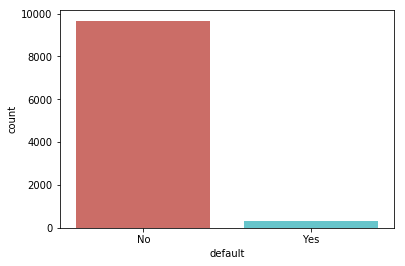

In [4]:
sns.countplot(x='default', data=data, palette='hls')
plt.show()

In [5]:
count_no = len(data[data['default']=='No'])
count_yes = len(data[data['default']=='Yes'])

pct_of_no = count_no/(count_no+count_yes)
print("percentage of no subscription is", pct_of_no*100)

pct_of_yes = count_yes/(count_no+count_yes)
print("percentage of subscription", pct_of_yes*100)

percentage of no subscription is 96.67
percentage of subscription 3.3300000000000005


In [6]:
data = data.drop(['recondNum'], axis=1)
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [7]:
mapping = {'Yes': 1, 'No': 0}
data.replace({'default': mapping},inplace=True)
data.replace({'student': mapping},inplace=True)
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [8]:
X = data.loc[:, data.columns != 'default']
y = data.loc[:, data.columns == 'default']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/snow/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/snow/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.97


In [11]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2886    1]
 [ 113    0]]


In [13]:
# The result is telling us that we have 2886+0 correct predictions and 1+113 incorrect predictions.